<a href="https://colab.research.google.com/github/Colinkl/SwEng/blob/master/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None)

In [ ]:
names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['Id'])

In [ ]:
for col in data.columns:
    fr = np.random.randint(5,10)/100
    data.loc[data.sample(frac = fr).index, col] = np.nan
data['Class'].fillna(data['Class'].value_counts().index[0], inplace=True)

In [ ]:
data['Class'] = data['Class'].astype('category')
meows = {}
dfm = pd.DataFrame()
for category in data['Class'].cat.categories:
    cat = data.loc[data['Class']==category]
    cat = cat.fillna(cat.mean())
    dfm = pd.concat([dfm, cat])
dfm.info()

data_fillna_mean = dfm.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Class   214 non-null    category
dtypes: category(1), float64(9)
memory usage: 17.1 KB


In [ ]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.158280,-0.157792,-0.409414,-0.460752,-0.269933,0.773310,-0.106976,0.137081
Na,-0.158280,1.000000,-0.255404,0.167437,-0.046892,-0.296126,-0.270771,0.511719,-0.244080
Mg,-0.157792,-0.255404,1.000000,-0.491591,-0.129687,-0.020831,-0.407102,-0.551752,0.089009
Al,-0.409414,0.167437,-0.491591,1.000000,-0.051426,0.325355,-0.239489,0.411016,-0.072160
Si,-0.460752,-0.046892,-0.129687,-0.051426,1.000000,-0.231078,-0.160642,0.080953,-0.132265
K,-0.269933,-0.296126,-0.020831,0.325355,-0.231078,1.000000,-0.284146,-0.073431,-0.013724
Ca,0.773310,-0.270771,-0.407102,-0.239489,-0.160642,-0.284146,1.000000,-0.172374,0.123090
Ba,-0.106976,0.511719,-0.551752,0.411016,0.080953,-0.073431,-0.172374,1.000000,-0.135378
Fe,0.137081,-0.244080,0.089009,-0.072160,-0.132265,-0.013724,0.123090,-0.135378,1.000000


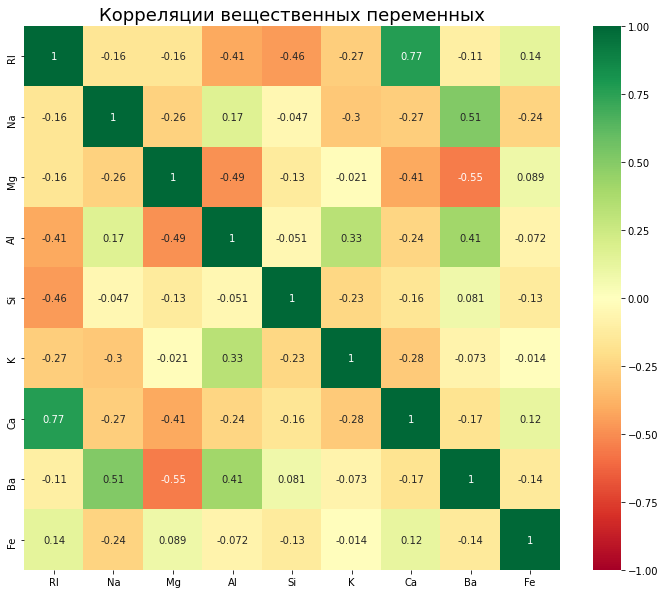

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Корреляции вещественных переменных', fontsize=18)

plt.show()

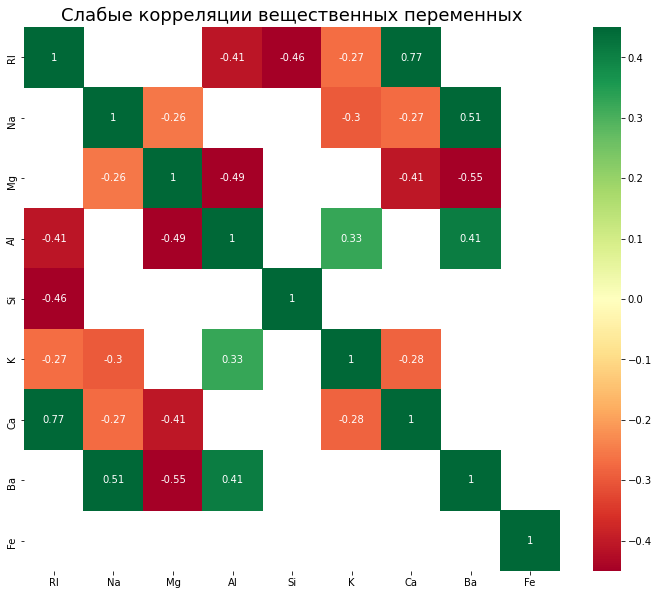

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>=0.25)|(corr<=-0.25)], annot=True, vmax=0.45, vmin=-0.45, cmap='RdYlGn')

ax.set_title('Слабые корреляции вещественных переменных', fontsize=18)

plt.show()

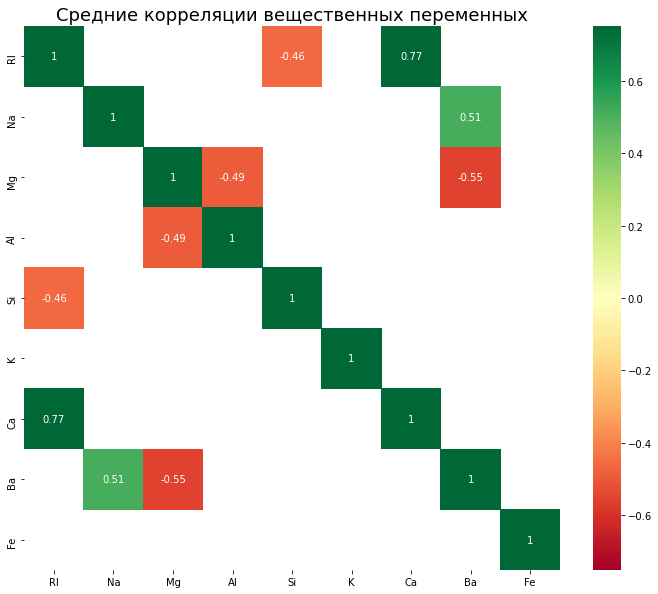

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>=0.45)|(corr<=-0.45)], annot=True, vmax=0.75, vmin=-0.75, cmap='RdYlGn')

ax.set_title('Средние корреляции вещественных переменных', fontsize=18)

plt.show()